In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel("/content/case 4.xlsx")

In [7]:
df

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,CUS1,25,5,Urban,Male
1,CUS2,30,10,Urban,Male
2,CUS3,25,8,Rural,Female
3,CUS4,35,15,Rural,Female
4,CUS5,45,20,Urban,Male
5,CUS6,20,5,Urban,Male
6,CUS7,50,20,Urban,Male
7,CUS8,40,10,Urban,Female


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()

In [10]:
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

In [11]:
df['Gender_encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [12]:
df

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender,Gender_encoded
0,CUS1,25,5,Urban,Male,0
1,CUS2,30,10,Urban,Male,0
2,CUS3,25,8,Rural,Female,1
3,CUS4,35,15,Rural,Female,1
4,CUS5,45,20,Urban,Male,0
5,CUS6,20,5,Urban,Male,0
6,CUS7,50,20,Urban,Male,0
7,CUS8,40,10,Urban,Female,1


In [13]:
df['demography_encoded'] = df['Demography'].map({'Rural': 0, 'Urban': 1})

In [14]:
df

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender,Gender_encoded,demography_encoded
0,CUS1,25,5,Urban,Male,0,1
1,CUS2,30,10,Urban,Male,0,1
2,CUS3,25,8,Rural,Female,1,0
3,CUS4,35,15,Rural,Female,1,0
4,CUS5,45,20,Urban,Male,0,1
5,CUS6,20,5,Urban,Male,0,1
6,CUS7,50,20,Urban,Male,0,1
7,CUS8,40,10,Urban,Female,1,1


In [15]:
df.drop(['CustomerID','Demography','Gender'],axis=1,inplace=True)

In [16]:
df

,Age,Income (INR) (in lakhs per annum),Gender_encoded,demography_encoded
0,25,5,0,1
1,30,10,0,1
2,25,8,1,0
3,35,15,1,0
4,45,20,0,1
5,20,5,0,1
6,50,20,0,1
7,40,10,1,1


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [18]:
df['Age']=sc.fit_transform(df[['Age']])
df['Income (INR) (in lakhs per annum)']=sc.fit_transform(df[['Income (INR) (in lakhs per annum)']])


In [19]:
df

,Age,Income (INR) (in lakhs per annum),Gender_encoded,demography_encoded
0,-0.881917,-1.166880,0,1
1,-0.377964,-0.286216,0,1
2,-0.881917,-0.638482,1,0
3,0.125988,0.594448,1,0
4,1.133893,1.475113,0,1
5,-1.385870,-1.166880,0,1
6,1.637846,1.475113,0,1
7,0.629941,-0.286216,1,1


In [27]:
array_representation = df.to_numpy()

In [29]:
array_representation

array([[-0.8819171 , -1.16688016,  0.        ,  1.        ,  1.        ],
       [-0.37796447, -0.28621589,  0.        ,  1.        ,  1.        ],
       [-0.8819171 , -0.6384816 ,  1.        ,  0.        ,  1.        ],
       [ 0.12598816,  0.59444838,  1.        ,  0.        ,  0.        ],
       [ 1.13389342,  1.47511265,  0.        ,  1.        ,  0.        ],
       [-1.38586973, -1.16688016,  0.        ,  1.        ,  1.        ],
       [ 1.63784605,  1.47511265,  0.        ,  1.        ,  0.        ],
       [ 0.62994079, -0.28621589,  1.        ,  1.        ,  0.        ]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


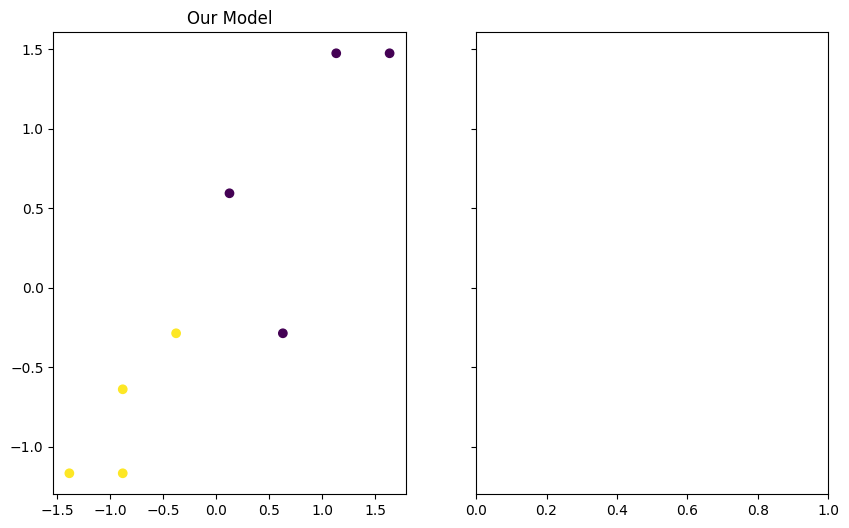

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_clusters = 2


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

ax1.set_title('Our Model')
ax1.scatter(array_representation[:, 0], array_representation[:, 1], c=df['Cluster'], cmap='viridis')
plt.show()

In [21]:
model = KMeans(n_clusters=2)
model.fit(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [26]:
X_scaled

array([[-0.8819171 , -1.16688016, -0.77459667,  0.57735027],
       [-0.37796447, -0.28621589, -0.77459667,  0.57735027],
       [-0.8819171 , -0.6384816 ,  1.29099445, -1.73205081],
       [ 0.12598816,  0.59444838,  1.29099445, -1.73205081],
       [ 1.13389342,  1.47511265, -0.77459667,  0.57735027],
       [-1.38586973, -1.16688016, -0.77459667,  0.57735027],
       [ 1.63784605,  1.47511265, -0.77459667,  0.57735027],
       [ 0.62994079, -0.28621589,  1.29099445,  0.57735027]])

In [22]:
model.labels_

array([1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

In [23]:
model.cluster_centers_

array([[ 0.8819171 ,  0.81461445,  0.5       ,  0.75      ,  0.        ],
       [-0.8819171 , -0.81461445,  0.25      ,  0.75      ,  1.        ]])

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4502842617553549
